In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/stroke_data.csv')
df.head()


In [ ]:
# 1. Drop the 'id' column (not useful for prediction)
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# 2. Fill missing values in 'bmi' with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# 3. Optional sanity check: confirm no more nulls
print("Missing values after cleaning:")
print(df.isnull().sum())


EDA

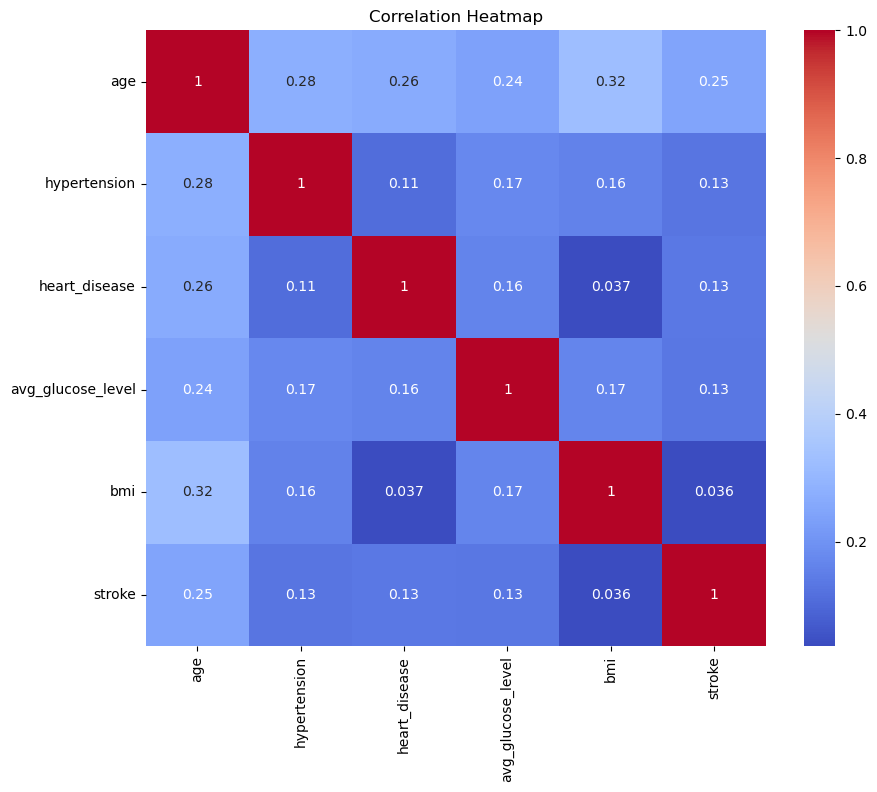

In [26]:
# Import libraries (if not already at top of notebook)
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include='number')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../visualizations/correlation_heatmap.png')  # ✅ Save before show
plt.show()


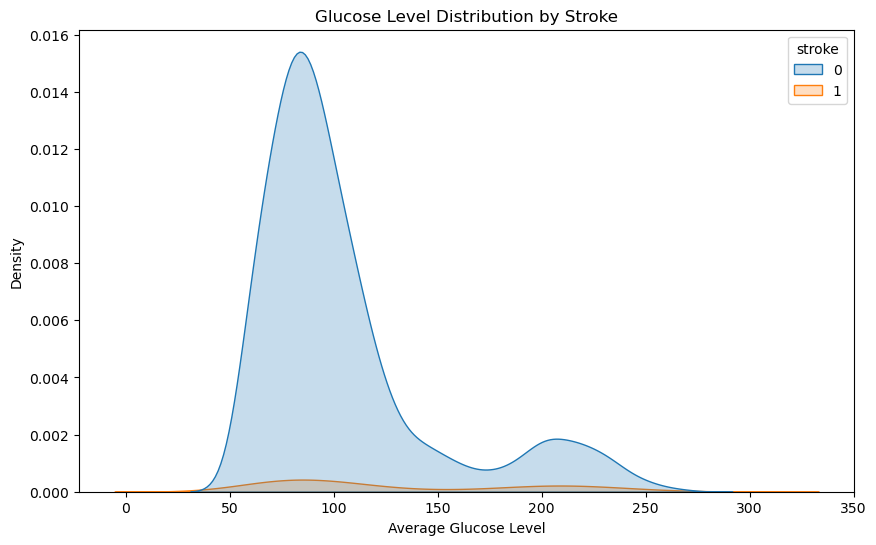

In [27]:
# KDE plot: avg_glucose_level distribution by stroke
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True)
plt.title('Glucose Level Distribution by Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.savefig('../visualizations/kde_plot.png')  # ✅ Save before show
plt.show()


Encoding

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)


 Train/Test Split + SMOTE Resampling

In [18]:
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']


Spliting

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


SMOTE to training data only

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Training model (Random Forest Classifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)


Making predictions

In [22]:
y_pred = model.predict(X_test)


 Evaluate the Model


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Privacy, Data Security, and Ethical Issues

In this stroke prediction project, several privacy and ethical issues arise due to the sensitive nature of health data:

Privacy: The dataset contains personal medical information such as hypertension, heart disease, and stroke history. Mishandling or exposing such data could violate patient confidentiality.

Data Security: If the data is stored or transmitted without encryption, it may be vulnerable to breaches or misuse.

Bias and Fairness: There could be biases in the model if the dataset underrepresents certain groups (e.g. by age or gender), leading to unfair predictions.

Consent: It's unclear if individuals whose data is used gave explicit consent for data mining or model training.

Accountability: Incorrect predictions from the model could have real-world consequences, especially in healthcare, so there needs to be clear responsibility for decisions based on the model.

Measures for Responsible Data Mining

To address these concerns and ensure responsible data mining:

Anonymize data to strip personally identifiable information.

Encrypt datasets during storage and transmission to secure sensitive content.

Audit models for bias by evaluating performance across demographic groups.

Use transparent documentation (model cards, data datasheets) to disclose limitations and assumptions.

Obtain informed consent before using real-world health data.

Ensure model interpretability so that predictions can be explained to clinicians or stakeholders.

Establish accountability by monitoring predictions and enabling human oversight in decision-making.

